In [1]:
# Code written by Ji Zhang, last modified on 2024-11-08
# For manuscript "Thickness-dependent response of aerosol-jet-printed ultrathin high-aspect-ratio electrochemical microactuators"
# email: zhangji1623316718@gmail.com

import pandas as pd
import os
import numpy as np
import scipy as sp
from scipy import integrate
from scipy.optimize import curve_fit
from scipy.optimize import newton
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import MultipleLocator
def average(lst):
  return sum(lst)/len(lst)
def sd(lst):
  n = len(lst)
  m = sum(lst)/n
  var = sum((np.array(lst)-m)**2)/n
  return np.sqrt(var)
def sds(lst):
  n = len(lst)
  m = sum(lst)/n
  var = sum((np.array(lst)-m)**2)/(n-1)
  return np.sqrt(var)
class my_dictionary(dict):
  def __init__(self):
    self = dict()
  # Function to add key:value
  def add(self, key, value):
    self[key] = value

# Plot rc parameters adapted from Tom Wade
fig, ax = plt.subplots() # Need to open a 'plot' so that pcParams actually works
plt.close()
plt.rcParams['text.color'] = 'black'
plt.rcParams['axes.labelcolor'] = 'black'
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['figure.facecolor'] = 'white'

plt.rcParams.update({
    'font.size': 14,          # controls default text sizes
    'axes.labelsize': 14,     # fontsize of the x and y labels
    'axes.titlesize': 14,     # fontsize of the axes title
    'xtick.labelsize': 14,    # fontsize of the tick labels
    'ytick.labelsize': 14,    # fontsize of the tick labels
    'legend.fontsize': 14,    # fontsize of the legend
    'figure.titlesize': 16,   # fontsize of the figure title
})

current_folder_path = os.getcwd().replace('\\', '/')
print(current_folder_path)
PPpath = current_folder_path + '/PP thickness varied'
nafpath = current_folder_path + '/Nafion thickness varied'

c:/Users/jz495/OneDrive - University of Cambridge/Papers/Soft Matter/Zhang_et_al_data/Actuation/DC thickness dependence


In [2]:
def get_df(folder_IV_path, folder_def_path, startwith):
    for filename1 in os.listdir(folder_def_path):
        # if True:
        if filename1.startswith(startwith):
            filedef = os.path.join(folder_def_path, filename1).replace('\\', '/')
            for filename2 in os.listdir(folder_IV_path):
                if filename2.startswith(filename1[0:4]):
                    fileIV = os.path.join(folder_IV_path, filename2).replace('\\', '/')
                    break
            df1 = pd.read_csv(fileIV, sep='\t', header=None)
            df2 = pd.read_csv(filedef, sep=',', header=None)
            df2[3] = np.arctan(df2[2]/df2[1])
            break
    return df1, df2

def read(df1, df2):
    # df1 = pd.read_csv(fileIV, sep='\t', header=None)
    # df2 = pd.read_csv(filedef, sep=',', header=None)
    ti = df1[0].to_numpy()
    I = df1[2].to_numpy()
    V = df1[3].to_numpy()
    td = df2[0].to_numpy()
    # dx = df2[1].to_numpy()
    # dy = df2[2].to_numpy()
    # d = np.arctan(dy/dx)
    d = df2[3].to_numpy()
    return ti, I, V, td, d

def plot_V_I_def(ti, I, V, td, d):
    fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(20,8), sharex=True, gridspec_kw=dict(height_ratios=[2, 3, 3]))

    ax1.plot(ti, V, color='tab:orange', lw=1)
    ax1.set_ylabel('$V$/V', color='black')
    # ax2.scatter(ti, I, color='blue', marker='o', edgecolors='blue', s=10, alpha=0.5, facecolors="none")
    # ax3.scatter(td, d, color='green', marker='s', edgecolors='green', s=10, alpha=0.5, facecolors="none")
    ax2.plot(ti, I, color='blue', lw=1)
    ax2.set_ylabel('$I$/mA', color='black')
    ax3.plot(td, d, color='green', lw=1)
    
    ax1.axhline(y=0, color='#999999', linestyle='--')
    ax2.axhline(y=0, color='#999999', linestyle='--')

    ax3.set(xlabel='Time/s', ylabel=r'$\theta$/rad')
    ax3.xaxis.label.set_color('black')
    ax3.yaxis.label.set_color('black')

    plt.setp(ax1.get_xticklabels(), visible=False)
    plt.setp(ax2.get_xticklabels(), visible=False)

    ax3.axhline(y=d[3], color='#999999', linestyle='--')
    # remove last tick label for the second subplot
    yticks = ax1.yaxis.get_major_ticks()
    yticks[-1].label1.set_visible(False)
    plt.subplots_adjust(hspace=.0)

    ax1.tick_params(direction='out', length=5, width=1, colors='black')
    ax2.tick_params(direction='out', length=5, width=1, colors='black')
    ax3.tick_params(direction='out', length=5, width=1, colors='black')

    ax1.grid(axis = 'x', which='minor')
    ax2.grid(axis = 'x', which='minor')
    ax3.grid(axis = 'x', which='minor')
    ax1.grid(axis = 'x', which='major')
    ax2.grid(axis = 'x', which='major')
    ax3.grid(axis = 'x', which='major')
    return fig, (ax1, ax2, ax3)

def scatter_V_I_def(ti, I, V, td, d):
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize=(14,7), sharex=True, gridspec_kw=dict(height_ratios=[2, 3, 3, 3]))

    # ax1.scatter(ti, V, color='tab:orange', marker='o', edgecolors='tab:orange', s=10, alpha=0.3, facecolors="none")
    ax1.plot(ti, V, color='tab:orange', lw=1)
    ax1.set_ylabel('$V$/V', color='black')
    ax2.scatter(ti, I, color='blue', marker='o', edgecolors='blue', s=10, alpha=0.3, facecolors="none")
    ax2.set_ylabel('$I$/mA', color='black')
    
    ax1.axhline(y=0, color='#999999', linestyle='--')
    ax2.axhline(y=0, color='#999999', linestyle='--')
    ax3.axhline(y=0, color='#999999', linestyle='--')
    ax3.set_ylabel(r'$Q_{fit}$/mC', color='black')
    
    ax4.scatter(td, d, color='green', marker='s', edgecolors='green', s=10, alpha=0.3, facecolors="none")
    ax4.set(xlabel='Time/s', ylabel=r'$\theta$/rad')
    ax4.xaxis.label.set_color('black')
    ax4.yaxis.label.set_color('black')
    
    plt.setp(ax1.get_xticklabels(), visible=False)
    plt.setp(ax2.get_xticklabels(), visible=False)

    ax4.axhline(y=d[1], color='#999999', linestyle='--')
    # remove last tick label for the second subplot
    yticks = ax1.yaxis.get_major_ticks()
    yticks[-1].label1.set_visible(False)
    plt.subplots_adjust(hspace=.0)
    yticks = ax2.yaxis.get_major_ticks()
    yticks[-1].label1.set_visible(False)
    plt.subplots_adjust(hspace=.0)
    yticks = ax3.yaxis.get_major_ticks()
    yticks[-1].label1.set_visible(False)
    plt.subplots_adjust(hspace=.0)

    ax1.tick_params(direction='out', length=5, width=1, colors='black')
    ax2.tick_params(direction='out', length=5, width=1, colors='black')
    ax3.tick_params(direction='out', length=5, width=1, colors='black')
    ax4.tick_params(direction='out', length=5, width=1, colors='black')
    
    return fig, (ax1, ax2, ax3, ax4)

def plot_V_I_Q_def(ti, I, V, td, d):
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize=(20,8), sharex=True, gridspec_kw=dict(height_ratios=[2, 3, 3, 3]))

    ax1.plot(ti, V, color='tab:orange', lw=1)
    ax1.set_ylabel('$V$/V', color='black')
    ax2.plot(ti, I, color='blue', lw=1)
    ax2.set_ylabel('$I$/mA', color='black')
    Q = sp.integrate.cumulative_trapezoid(I, ti, initial=0)
    ax3.plot(ti, Q, color='tab:blue', lw=1)
    
    ax1.axhline(y=0, color='#999999', linestyle='--')
    ax2.axhline(y=0, color='#999999', linestyle='--')
    ax3.axhline(y=0, color='#999999', linestyle='--')
    ax3.set_ylabel(r'$Q_{fit}$/mC', color='black')
    
    ax4.plot(td, d, color='green', lw=1)
    ax4.set(xlabel='Time/s', ylabel=r'$\theta$/rad')
    ax4.xaxis.label.set_color('black')
    ax4.yaxis.label.set_color('black')
    
    plt.setp(ax1.get_xticklabels(), visible=False)
    plt.setp(ax2.get_xticklabels(), visible=False)

    ax4.axhline(y=d[3], color='#999999', linestyle='--')
    # remove last tick label for the second subplot
    yticks = ax1.yaxis.get_major_ticks()
    yticks[-1].label1.set_visible(False)
    plt.subplots_adjust(hspace=.0)
    yticks = ax2.yaxis.get_major_ticks()
    yticks[-1].label1.set_visible(False)
    plt.subplots_adjust(hspace=.0)
    yticks = ax3.yaxis.get_major_ticks()
    yticks[-1].label1.set_visible(False)
    plt.subplots_adjust(hspace=.0)

    ax1.tick_params(direction='out', length=5, width=1, colors='black')
    ax2.tick_params(direction='out', length=5, width=1, colors='black')
    ax3.tick_params(direction='out', length=5, width=1, colors='black')
    ax4.tick_params(direction='out', length=5, width=1, colors='black')

    return fig, (ax1, ax2, ax3, ax4), Q

def readSplit(df1, df2, marks):
    
    # marks = [i*interval for i in range(nInterval)]

    df_I = my_dictionary()
    df_d = my_dictionary()
    pd.options.mode.chained_assignment = None
    for i in range(len(marks)-1):
        values_I = df1[(df1[0]>marks[i]) & (df1[0]<marks[i+1])]
        values_d = df2[(df2[0]>marks[i]) & (df2[0]<marks[i+1]-0.12)]
        # print(values_I.iloc[0,2])
        index = values_I.index[0]
        if i!=0:
            for j in range(5):
                if abs(values_I.iloc[0,2])<0.005:
                    values_I.drop([index+j], inplace=True)
                else:
                    break
    
        df_I.add(i, values_I)
        df_d.add(i, values_d)
    timeI = []
    VV=[]
    II=[]
    timed = []
    dd=[]
    for i in range(len(marks)-1):
        timeI.append(df_I[i][0].to_numpy()-marks[i])
        VV.append(df_I[i][3].to_numpy())
        II.append(df_I[i][2].to_numpy())
        timed.append(df_d[i][0].to_numpy()-marks[i])
        dd.append(df_d[i][3].to_numpy())
    return timeI, VV, II, timed, dd

def plot_part(timeI, VV, II, timed, dd, i):
    fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(20,8), sharex=True, gridspec_kw=dict(height_ratios=[2, 3, 3]))
    ax1.scatter(timeI[i], VV[i], color='tab:orange', marker='o', edgecolors='tab:orange', s=10, alpha=0.3, facecolors="none")
    ax1.set_ylabel('$V$/V', color='black')
    ax2.scatter(timeI[i], II[i], color='blue', marker='o', edgecolors='blue', s=10, alpha=0.3, facecolors="none")
    ax2.set_ylabel('$I$/mA', color='black')
    ax3.scatter(timed[i], dd[i], color='green', marker='s', edgecolors='green', s=10, alpha=0.3, facecolors="none")
    ax3.set(xlabel='Time/s', ylabel=r'$\theta$/rad')
    ax3.xaxis.label.set_color('black')
    ax3.yaxis.label.set_color('black')
    plt.setp(ax1.get_xticklabels(), visible=False)
    plt.setp(ax2.get_xticklabels(), visible=False)
    # remove last tick label for the second subplot
    yticks = ax2.yaxis.get_major_ticks()
    yticks[-1].label1.set_visible(False)
    plt.subplots_adjust(hspace=.0)
    ax1.tick_params(direction='out', length=5, width=1, colors='black')
    ax2.tick_params(direction='out', length=5, width=1, colors='black')
    ax3.tick_params(direction='out', length=5, width=1, colors='black')

    ax2.axhline(y=0, color='#999999', linestyle='--')
    # ax3.axhline(y=D, color='#999999', linestyle='--')
    # ax2.plot(timeI[i], Ifit, color='blue', lw=1)
    # ax3.plot(timed[i], dfit, color='green', lw=1)
    return fig, (ax1, ax2, ax3)

In [3]:
def chargeI(x, A1, A2, t1, t2, C): #5 para
    y = A1*np.exp(-x/t1) + A2*np.exp(-x/t2) + C
    return y
# def chargeI(x, A1, A2, t1, t2): #4 para
#     y = A1*np.exp(-x/t1) + A2*np.exp(-x/t2)
#     return y
def chargedef(x, B1, B2, t3, t4, D): #5 para
    y = B1*(1-np.exp(-x/t3)) + B2*(1-np.exp(-x/t4)) + D
    return y
def chargeQ(x, A1, A2, t1, t2):
    y = A1*t1*(1-np.exp(-x/t1)) + A2*t2*(1-np.exp(-x/t2))
    return y

def shortI(x, A1, A2, t1, t2): #4 para
    y = -A1*np.exp(-x/t1) - A2*np.exp(-x/t2)
    return y
def shortdef(x, B1, B2, t3, t4, D): #5 para
    y = B1*np.exp(-x/t3) + B2*np.exp(-x/t4) + D
    return y
def shortQ(x, A1, A2, t1, t2):
    y = -A1*t1*(1-np.exp(-x/t1)) - A2*t2*(1-np.exp(-x/t2))
    return y

def twoExp(x, A1, t1, t2): #3 para
    y = A1*np.exp(-x/t1) + (0.6-A1)*np.exp(-x/t2)
    return y

In [ ]:
# PP thickness varied: DC chronoamperometry without fitting, for all data visualisation

folder_IV_path = f"{PPpath}/IV"
folder_def_path = f"{PPpath}/def"
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize=(20,8), sharex=True, gridspec_kw=dict(height_ratios=[2, 3, 3, 3]))


plt.rcParams.update({'font.size': 16})
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16

def plot_V_I_Q_def(df1, df2, ti, I, V, td, d):
    ax1.plot(ti, abs(V), color='tab:orange', lw=1)
    ax1.set_ylabel(r'$V_{appl}$ (V)', color='black')
    ax2.plot(ti, I, color='green', lw=1) if V[2200]>0.1 else ax2.plot(ti, I, color='red', lw=1)
    ax2.set_ylabel('$I$ (mA)', color='black')

    marks = [i*50 for i in range(16)]
    timeI, VV, II, timed, dd = readSplit(df1, df2, marks)
    df = pd.DataFrame(columns=['V', 'A1', 'A2', 't1', 't2', 'C', 'B1', 'B2', 't3', 't4', 'D', 'Qp'])

    Vs=[0.2, 0.4, 0.6, 0.8, 0.6, 0.4, 0.2]

    for i in [1, 3, 5, 7, 9, 11, 13]:
        def fitI(x, A1, A2, t1, t2, C):
            x1 = x[:len(timeI[i])]
            x2 = x[len(timeI[i]):]
            y1 = chargeI(x1, A1, A2, t1, t2, C)
            y2 = shortI(x2, A1, A2, t1, t2)
            return np.concatenate((y1,y2))

        k = len(df)
        VV = Vs[k]
        paraI, covI = curve_fit(fitI, np.concatenate((timeI[i], timeI[i+1])), np.concatenate((II[i], II[i+1])), p0=[0.1*VV, 0.05*VV, 0.3, 2.5, 0.0004])

        A1, A2, t1, t2, C = paraI
        Q0 = 0

        times = np.arange(0,50,0.2)
        Qfit = chargeQ(times, A1, A2, t1, t2) + Q0
        Qp = Qfit[-1]
        Qfit2 = shortQ(times, A1, A2, t1, t2) + Qp

        ax3.plot(times+marks[i], Qfit, color='green', lw=1) if V[2200]>0.1 else ax3.plot(times+marks[i], -Qfit, color='red', lw=1)
        ax3.plot(times+marks[i+1], Qfit2, color='green', lw=1) if V[2200]>0.1 else ax3.plot(times+marks[i+1], -Qfit2, color='red', lw=1)


    Q = sp.integrate.cumulative_trapezoid(I, ti, initial=0)
    # ax3.plot(ti, Q, color='green', lw=1) if V[2200]>0.1 else ax3.plot(ti, Q, color='red', lw=1)
    
    ax1.axhline(y=0, color='#999999', linestyle='--')
    ax2.axhline(y=0, color='#999999', linestyle='--')
    ax3.axhline(y=0, color='#999999', linestyle='--')
    ax3.set_ylabel(r'$Q_{fit}$ (mC)', color='black')
    
    ax4.plot(td, d, color='green', lw=1) if V[2200]>0.1 else ax4.plot(td, d, color='red', lw=1)
    ax4.set(xlabel='Time (s)', ylabel=r'$\theta$ (rad)')
    ax4.xaxis.label.set_color('black')
    ax4.yaxis.label.set_color('black')
    ax4.set_xlim(left=0)
    
    plt.setp(ax1.get_xticklabels(), visible=False)
    plt.setp(ax2.get_xticklabels(), visible=False)

    ax4.axhline(y=d[3], color='#999999', linestyle='--')
    # remove last tick label for the second subplot
    yticks = ax1.yaxis.get_major_ticks()
    yticks[-1].label1.set_visible(False)
    plt.subplots_adjust(hspace=.0)
    yticks = ax2.yaxis.get_major_ticks()
    yticks[-1].label1.set_visible(False)
    plt.subplots_adjust(hspace=.0)
    yticks = ax3.yaxis.get_major_ticks()
    yticks[-1].label1.set_visible(False)
    plt.subplots_adjust(hspace=.0)

    ax1.tick_params(direction='out', length=5, width=1, colors='black')
    ax2.tick_params(direction='out', length=5, width=1, colors='black')
    ax3.tick_params(direction='out', length=5, width=1, colors='black')
    ax4.tick_params(direction='out', length=5, width=1, colors='black')

    return fig, (ax1, ax2, ax3, ax4), Q


def plotVIQdef(startwith):
    df1, df2 = get_df(folder_IV_path, folder_def_path, str(startwith))
    ti, I, V, td, d = read(df1, df2)
    d= d- d[10] if V[2200]>0.1 else d[10]-d
    I = -I if V[2200]<0 else I
    fig, (ax1, ax2, ax3, ax4), Q = plot_V_I_Q_def(df1, df2, ti, I, V, td, d)
    return fig, (ax1, ax2, ax3, ax4), Q

# extract first 4 characters of every filename in the def folder
startwith = [filename[:4] for filename in os.listdir(folder_def_path)]
startwith = list(set(startwith))
startwith.sort()

for i in [6725, 6726, 6727, 6728, 6729, 6730, 6731]: #no 6724
# for i in [6726, 6728, 6730]: #no 6724
    plotVIQdef(i)
plt.text(0.5, 1.1, f'PEDOT:PSS 1 printing pass', horizontalalignment='center', verticalalignment='center', transform=ax1.transAxes, fontsize=17, color='black', fontweight='bold')
# plt.savefig('PP1.svg', format='svg')

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize=(20,8), sharex=True, gridspec_kw=dict(height_ratios=[2, 3, 3, 3]))
for i in [6733, 6734, 6735, 6736, 6737, 6738, 6739, 6740, 6741]: #no 6732
    plotVIQdef(i)
plt.text(0.5, 1.1, f'PEDOT:PSS 2 printing passes', horizontalalignment='center', verticalalignment='center', transform=ax1.transAxes, fontsize=17, color='black', fontweight='bold')
# plt.savefig('PP2.svg', format='svg')

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize=(20,8), sharex=True, gridspec_kw=dict(height_ratios=[2, 3, 3, 3]))
for i in [6743, 6744, 6745, 6746, 6747, 6748, 6750]: #no 6742
    plotVIQdef(i)
plt.text(0.5, 1.1, f'PEDOT:PSS 3 printing passes', horizontalalignment='center', verticalalignment='center', transform=ax1.transAxes, fontsize=17, color='black', fontweight='bold')
# plt.savefig('PP3.svg', format='svg')

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize=(20,8), sharex=True, gridspec_kw=dict(height_ratios=[2, 3, 3, 3]))
for i in [6751, 6752, 6753, 6754, 6755, 6756, 6757, 6758, 6760]: #no 6759
    plotVIQdef(i)
plt.text(0.5, 1.1, f'PEDOT:PSS 4 printing passes', horizontalalignment='center', verticalalignment='center', transform=ax1.transAxes, fontsize=17, color='black', fontweight='bold')
# plt.savefig('PP4.svg', format='svg')

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize=(20,8), sharex=True, gridspec_kw=dict(height_ratios=[2, 3, 3, 3]))
for i in [6762, 6763, 6764, 6766, 6767, 6768, 6769]: #no 6765
    plotVIQdef(i)
plt.text(0.5, 1.1, f'PEDOT:PSS 5 printing passes', horizontalalignment='center', verticalalignment='center', transform=ax1.transAxes, fontsize=17, color='black', fontweight='bold')
# plt.savefig('PP5.svg', format='svg')

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize=(20,8), sharex=True, gridspec_kw=dict(height_ratios=[2, 3, 3, 3]))
for i in [6771, 6772, 6773, 6774, 6776, 6777, 6778, 6779]: #no 6775
    plotVIQdef(i)
plt.text(0.5, 1.1, f'PEDOT:PSS 6 printing passes', horizontalalignment='center', verticalalignment='center', transform=ax1.transAxes, fontsize=17, color='black', fontweight='bold')
# plt.savefig('PP6.svg', format='svg')

In [ ]:
# Naf thickness varied: DC chronoamperometry without fitting, for all data visualisation

folder_IV_path = f"{nafpath}/IV"
folder_def_path = f"{nafpath}/def"
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize=(20,8), sharex=True, gridspec_kw=dict(height_ratios=[2, 3, 3, 3]))

plt.rcParams.update({'font.size': 16})
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16

def plot_V_I_Q_def(df1, df2, ti, I, V, td, d):
    ax1.plot(ti, abs(V), color='tab:orange', lw=1)
    ax1.set_ylabel(r'$V_{appl}$ (V)', color='black')
    ax2.plot(ti, I, color='green', lw=1) if V[2200]>0.1 else ax2.plot(ti, I, color='red', lw=1)
    ax2.set_ylabel('$I$ (mA)', color='black')

    marks = [i*50 for i in range(16)]
    timeI, VV, II, timed, dd = readSplit(df1, df2, marks)
    df = pd.DataFrame(columns=['V', 'A1', 'A2', 't1', 't2', 'C', 'B1', 'B2', 't3', 't4', 'D', 'Qp'])

    Vs=[0.2, 0.4, 0.6, 0.8, 0.6, 0.4, 0.2]

    for i in [1, 3, 5, 7, 9, 11, 13]:
        def fitI(x, A1, A2, t1, t2, C):
            x1 = x[:len(timeI[i])]
            x2 = x[len(timeI[i]):]
            y1 = chargeI(x1, A1, A2, t1, t2, C)
            y2 = shortI(x2, A1, A2, t1, t2)
            return np.concatenate((y1,y2))

        k = len(df)
        VV = Vs[k]
        paraI, covI = curve_fit(fitI, np.concatenate((timeI[i], timeI[i+1])), np.concatenate((II[i], II[i+1])), p0=[0.1*VV, 0.05*VV, 0.3, 2.5, 0.0004])

        A1, A2, t1, t2, C = paraI
        Q0 = 0

        times = np.arange(0,50,0.2)
        Qfit = chargeQ(times, A1, A2, t1, t2) + Q0
        Qp = Qfit[-1]
        Qfit2 = shortQ(times, A1, A2, t1, t2) + Qp

        ax3.plot(times+marks[i], Qfit, color='green', lw=1) if V[2200]>0.1 else ax3.plot(times+marks[i], -Qfit, color='red', lw=1)
        ax3.plot(times+marks[i+1], Qfit2, color='green', lw=1) if V[2200]>0.1 else ax3.plot(times+marks[i+1], -Qfit2, color='red', lw=1)


    Q = sp.integrate.cumulative_trapezoid(I, ti, initial=0)
    # ax3.plot(ti, Q, color='green', lw=1) if V[2200]>0.1 else ax3.plot(ti, Q, color='red', lw=1)
    
    ax1.axhline(y=0, color='#999999', linestyle='--')
    ax2.axhline(y=0, color='#999999', linestyle='--')
    ax3.axhline(y=0, color='#999999', linestyle='--')
    ax3.set_ylabel(r'$Q_{fit}$ (mC)', color='black')
    
    ax4.plot(td, d, color='green', lw=1) if V[2200]>0.1 else ax4.plot(td, d, color='red', lw=1)
    ax4.set(xlabel='Time (s)', ylabel=r'$\theta$ (rad)')
    ax4.xaxis.label.set_color('black')
    ax4.yaxis.label.set_color('black')
    ax4.set_xlim(left=0)
    plt.setp(ax1.get_xticklabels(), visible=False)
    plt.setp(ax2.get_xticklabels(), visible=False)

    ax4.axhline(y=d[3], color='#999999', linestyle='--')
    # remove last tick label for the second subplot
    yticks = ax1.yaxis.get_major_ticks()
    yticks[-1].label1.set_visible(False)
    plt.subplots_adjust(hspace=.0)
    yticks = ax2.yaxis.get_major_ticks()
    yticks[-1].label1.set_visible(False)
    plt.subplots_adjust(hspace=.0)
    yticks = ax3.yaxis.get_major_ticks()
    yticks[-1].label1.set_visible(False)
    plt.subplots_adjust(hspace=.0)

    ax1.tick_params(direction='out', length=5, width=1, colors='black')
    ax2.tick_params(direction='out', length=5, width=1, colors='black')
    ax3.tick_params(direction='out', length=5, width=1, colors='black')
    ax4.tick_params(direction='out', length=5, width=1, colors='black')

    return fig, (ax1, ax2, ax3, ax4), Q


def plotVIQdef(startwith):
    df1, df2 = get_df(folder_IV_path, folder_def_path, str(startwith))
    ti, I, V, td, d = read(df1, df2)
    d= d- d[10] if V[2200]>0.1 else d[10]-d
    I = -I if V[2200]<0 else I
    fig, (ax1, ax2, ax3, ax4), Q = plot_V_I_Q_def(df1, df2, ti, I, V, td, d)
    return fig, (ax1, ax2, ax3, ax4), Q


for i in [6781, 6782, 6783, 6784, 6785, 6786, 6787, 6788, 6789, 6790]: #no 
# for i in [6726, 6728, 6730]: #no 6724
    plotVIQdef(i)
plt.text(0.5, 1.1, f'Nafion 5 printing passes', horizontalalignment='center', verticalalignment='center', transform=ax1.transAxes, fontsize=17, color='black', fontweight='bold')
# plt.savefig('Naf5.svg', format='svg')

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize=(20,8), sharex=True, gridspec_kw=dict(height_ratios=[2, 3, 3, 3]))
for i in [6791, 6792, 6793, 6794, 6795, 6796, 6797, 6798, 6799, 6800]:
    plotVIQdef(i)
plt.text(0.5, 1.1, f'Nafion 8 printing passes', horizontalalignment='center', verticalalignment='center', transform=ax1.transAxes, fontsize=17, color='black', fontweight='bold')
# plt.savefig('Naf8.svg', format='svg')

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize=(20,8), sharex=True, gridspec_kw=dict(height_ratios=[2, 3, 3, 3]))
for i in [6801, 6803, 6804, 6805, 6806, 6807, 6808, 6809, 6810, 6811, 6812, 6813]:
    plotVIQdef(i)
plt.text(0.5, 1.1, f'Nafion 11 printing passes', horizontalalignment='center', verticalalignment='center', transform=ax1.transAxes, fontsize=17, color='black', fontweight='bold')
# plt.savefig('Naf11.svg', format='svg')

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize=(20,8), sharex=True, gridspec_kw=dict(height_ratios=[2, 3, 3, 3]))
for i in [6815, 6816, 6817, 6818, 6819, 6820, 6821, 6822, 6823, 6824]:
    plotVIQdef(i)
plt.text(0.5, 1.1, f'Nafion 14 printing passes', horizontalalignment='center', verticalalignment='center', transform=ax1.transAxes, fontsize=17, color='black', fontweight='bold')
# plt.savefig('Naf14.svg', format='svg')

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize=(20,8), sharex=True, gridspec_kw=dict(height_ratios=[2, 3, 3, 3]))
for i in [6825, 6827, 6829, 6830, 6831, 6834, 6835]: #no 26 28 33
    plotVIQdef(i)
plt.text(0.5, 1.1, f'Nafion 17 printing passes', horizontalalignment='center', verticalalignment='center', transform=ax1.transAxes, fontsize=17, color='black', fontweight='bold')
# plt.savefig('Naf17.svg', format='svg')

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize=(20,8), sharex=True, gridspec_kw=dict(height_ratios=[2, 3, 3, 3]))
for i in [6837, 6838, 6839, 6840, 6841, 6842, 6843, 6844, 6845, 6846]:
    plotVIQdef(i)
plt.text(0.5, 1.1, f'Nafion 20 printing passes', horizontalalignment='center', verticalalignment='center', transform=ax1.transAxes, fontsize=17, color='black', fontweight='bold')
# plt.savefig('Naf20.svg', format='svg')

In [ ]:
## DC chronoamperometry PP thickeness varied

folder_IV_path = f"{PPpath}/IV"
folder_def_path = f"{PPpath}/def"

def fitTimesAmps(startwith):
    df1, df2 = get_df(folder_IV_path, folder_def_path, startwith=str(startwith))
    ti, I, V, td, d = read(df1, df2)

    marks = [i*50 for i in range(16)]
    timeI, VV, II, timed, dd = readSplit(df1, df2, marks)
    df = pd.DataFrame(columns=['V', 'A1', 'A2', 't1', 't2', 'C', 'B1', 'B2', 't3', 't4', 'D', 'Qp'])

    fig, (ax1, ax2, ax3, ax4) = scatter_V_I_def(ti, I, V, td, d)
    ax4.set_xlim(0,750)

    #display "startwith" in the plot
    ax1.text(0.1, 0.5, f'{startwith}', horizontalalignment='center', verticalalignment='center', transform=ax1.transAxes, fontsize=16, color='black')

    Vs=[0.2, 0.4, 0.6, 0.8, 0.6, 0.4, 0.2]

    for i in [1, 3, 5, 7, 9, 11, 13]:
        def fitI(x, A1, A2, t1, t2, C):
            x1 = x[:len(timeI[i])]
            x2 = x[len(timeI[i]):]
            y1 = chargeI(x1, A1, A2, t1, t2, C)
            y2 = shortI(x2, A1, A2, t1, t2)
            return np.concatenate((y1,y2))
        def fitdez(x, B1, B2, t3, t4, D):
            x1 = x[:len(timed[i])]
            x2 = x[len(timed[i]):]
            y1 = chargedef(x1, B1, B2, t3, t4, D)
            y2 = shortdef(x2, B1, B2, t3, t4, D)
            return np.concatenate((y1,y2))

        k = len(df)
        VV = Vs[k]
        paraI, covI = curve_fit(fitI, np.concatenate((timeI[i], timeI[i+1])), np.concatenate((II[i], II[i+1])), p0=[0.1*VV, 0.05*VV, 0.3, 2.5, 0.0004])
        parad, covd = curve_fit(fitdez, np.concatenate((timed[i], timed[i+1])), np.concatenate((dd[i], dd[i+1])), p0=[0.3*VV, 0.2*VV, 1, 5, -0.05])

        A1, A2, t1, t2, C = paraI
        B1, B2, t3, t4, D = parad
        Q0 = 0

        times = np.arange(0,50,0.2)
        Ifit = chargeI(times, A1, A2, t1, t2,C)
        dfit = chargedef(times, B1, B2, t3, t4, D)
        Qfit = chargeQ(times, A1, A2, t1, t2) + Q0
        Qp = Qfit[-1]

        Ifit2 = shortI(times, A1, A2, t1, t2)
        dfit2 = shortdef(times, B1, B2, t3, t4, D) 
        Qfit2 = shortQ(times, A1, A2, t1, t2) + Qp

        df.loc[k] = [VV, A1, A2, t1, t2, C*100, B1, B2, t3, t4, D, Qp]

        ax2.plot(times+marks[i], Ifit, color='blue', lw=1)
        ax2.plot(times+marks[i+1], Ifit2, color='blue', lw=1)
        ax3.plot(times+marks[i], Qfit, color='tab:blue', lw=1)
        ax3.plot(times+marks[i+1], Qfit2, color='tab:blue', lw=1)
        ax4.plot(times+marks[i], dfit, color='green', lw=1)
        ax4.plot(times+marks[i+1], dfit2, color='green', lw=1)
    # pd.options.display.float_format = "{:.2f}".format
    print(startwith)
    print(df)
    df.to_csv(f'{startwith}output.csv', index=False)
    # plt.savefig(f'{startwith}fittt.png',format='png',dpi=200)
    return df

# extract first 4 characters of every filename in the def folder
startwith = [filename[:4] for filename in os.listdir(folder_def_path)]
startwith = list(set(startwith))
startwith.sort()

for i in startwith:
    df = fitTimesAmps(i)

In [ ]:
folder_IV_path = f"{PPpath}/IV"
folder_def_path = f"{PPpath}/def"

def linear(x, m):
    return m*x

def linear2(x, m, c):
    return m*x + c

def timeFunction(x, A1, A2, t1, t2):
    return A1*np.exp(-x/t1) + A2*np.exp(-x/t2) - 0.1*(A1+ A2)

plt.rcParams.update({'font.size': 16})
plt.rcParams.update({'axes.labelsize': 16})

def plotOutput(file, thickness):
    # create string which concatenates the string 'file' with the string 'output.csv'
    file = str(file) + 'output.csv'
    df = pd.read_csv(file)

    fig, ((ax1, ax3, ax4, ax6)) = plt.subplots(1, 4, figsize=(16,4))

        # newton rhapson method to find x when time function is 0
    for rows in range(len(df)):
        df.loc[rows, 't_Q'] = fsolve(timeFunction, 0.1, args=(df.loc[rows, 'A1']*df.loc[rows, 't1'], df.loc[rows, 'A2']*df.loc[rows, 't2'], df.loc[rows, 't1'], df.loc[rows, 't2']))
        df.loc[rows, 't_def'] = fsolve(timeFunction, 0.1, args=(df.loc[rows, 'B1'], df.loc[rows, 'B2'], df.loc[rows, 't3'], df.loc[rows, 't4']))
    
    t_Q_mean = np.mean(df['t_Q'])
    t_def_mean = np.mean(df['t_def'])

    ax1.scatter(df['V'], df['t_Q'], color='tab:blue', marker='o', linewidths=1, edgecolors='tab:blue', s=30, alpha=1, facecolors="none", label='Time for 90% charge transfer')
    # ax1.scatter(df['V'], df['t2'], color='tab:orange', marker='o', linewidths=1, edgecolors='tab:orange', s=30, alpha=1, facecolors="none")
    ax1.set_xlabel('Applied voltage (V)')
    ax1.set_ylabel('Time for 90% charge transfer (s)')
    ax1.xaxis.label.set_color('black')
    ax1.yaxis.label.set_color('black')
    # connect datapoints of 't1' and 't2' with arrowed lines
    for i in range(len(df['V'])-1):
        ax1.annotate("", xy=(df['V'][i], df['t_Q'][i]), xytext=(df['V'][i+1], df['t_Q'][i+1]), arrowprops=dict(arrowstyle="-|>", color='tab:blue'))
    ax1.text(0.5, 0.2, f'mean = {t_Q_mean:.3}', horizontalalignment='center', verticalalignment='center', transform=ax1.transAxes, fontsize=16, color='black')

    ax4.scatter(df['V'], df['t_def'], color='tab:orange', marker='o', linewidths=1, edgecolors='tab:blue', s=30, alpha=1, facecolors="none")
    # ax4.scatter(df['V'], df['t4'], color='tab:orange', marker='o', linewidths=1, edgecolors='tab:orange', s=30, alpha=1, facecolors="none")
    ax4.set_xlabel('Applied voltage (V)')
    ax4.set_ylabel('Time for 90% deflection (s)')
    ax4.xaxis.label.set_color('black')
    ax4.yaxis.label.set_color('black')
    #connect datapoints of 't3' and 't4' with arrowed lines
    for i in range(len(df['V'])-1):
        ax4.annotate("", xy=(df['V'][i], df['t_def'][i]), xytext=(df['V'][i+1], df['t_def'][i+1]), arrowprops=dict(arrowstyle="-|>", color='tab:blue'))
    ax4.text(0.5, 0.2, f'mean = {t_def_mean:.3}', horizontalalignment='center', verticalalignment='center', transform=ax4.transAxes, fontsize=16, color='black')

    # plot 'Qp' vs 'V'
    ax3.scatter(df['V'], df['Qp'], color='black', marker='o', linewidths=1, edgecolors='black', s=30, alpha=1, facecolors="none")
    ax3.set_xlabel('Applied voltage (V)')
    ax3.set_ylabel('Charge transfer (mC)')
    ax3.xaxis.label.set_color('black')
    ax3.yaxis.label.set_color('black')
    #add a linear fit line through origin using curve_fit
    para, cov = curve_fit(linear, df['V'], df['Qp'])
    m_Q = para[0]
    x = np.linspace(0,0.8,100)
    y = m_Q*x
    # show m on plot
    ax3.text(0.5, 0.9, f'gradient = {m_Q:.3}', horizontalalignment='center', verticalalignment='center', transform=ax3.transAxes, fontsize=16, color='black')
    ax3.plot(x, y, color='green', lw=1)
    #connect datapoints of 'Qp' with arrowed lines
    for i in range(len(df['V'])-1):
        ax3.annotate("", xy=(df['V'][i], df['Qp'][i]), xytext=(df['V'][i+1], df['Qp'][i+1]), arrowprops=dict(arrowstyle="-|>", color='black'))

    # plot 'B1+B2' against 'V' on ax6
    df['B1+B2'] = df['B1']+df['B2']
    ax6.scatter(df['V'], df['B1+B2'] , color='black', marker='o', linewidths=1, edgecolors='black', s=30, alpha=1, facecolors="none")
    ax6.set_xlabel('Applied voltage (V)')
    ax6.set_ylabel('Deflection (rad)')
    ax6.xaxis.label.set_color('black')
    ax6.yaxis.label.set_color('black')
    para, cov = curve_fit(linear, df['V'], df['B1+B2'])
    m_def = para[0]
    x = np.linspace(0,0.8,100)
    ax6.plot(x, m_def*x, color='green', lw=1)
    ax6.text(0.5, 0.9, f'gradient = {m_def:.3}', horizontalalignment='center', verticalalignment='center', transform=ax6.transAxes, fontsize=16, color='black')
    #connect datapoints of 'B1+B2' with arrowed lines
    for i in range(len(df['V'])-1):
        ax6.annotate("", xy=(df['V'][i], df['B1+B2'][i]), xytext=(df['V'][i+1], df['B1+B2'][i+1]), arrowprops=dict(arrowstyle="-|>", color='black'))

    # make x axis 0.0 0.2 0.4 0.6 0.8
    ax1.xaxis.set_major_locator(MultipleLocator(0.2))
    ax1.xaxis.set_minor_locator(MultipleLocator(0.1))
    ax3.xaxis.set_major_locator(MultipleLocator(0.2))
    ax3.xaxis.set_minor_locator(MultipleLocator(0.1))
    ax4.xaxis.set_major_locator(MultipleLocator(0.2))
    ax4.xaxis.set_minor_locator(MultipleLocator(0.1))
    ax6.xaxis.set_major_locator(MultipleLocator(0.2))
    ax6.xaxis.set_minor_locator(MultipleLocator(0.1))

    ax1.set_xlim(left=0)
    ax3.set_xlim(left=0)
    ax4.set_xlim(left=0)
    ax6.set_xlim(left=0)

    ax1.set_ylim(bottom=0)
    # ax3.set_ylim(bottom=0)
    ax4.set_ylim(bottom=0)
    # ax6.set_ylim(bottom=0)

    plt.tight_layout()
    # decrease gap between subplots
    # plt.subplots_adjust(wspace=0.3)

    plt.text(2.5, 1.05, f'PEDOT:PSS {thickness} printing pass', horizontalalignment='center', verticalalignment='center', transform=ax1.transAxes, fontsize=17, color='black', fontweight='bold') if thickness==1 else plt.text(2.5, 1.05, f'PEDOT:PSS {thickness} printing passes', horizontalalignment='center', verticalalignment='center', transform=ax1.transAxes, fontsize=17, color='black', fontweight='bold')
    plt.text(0.0, 1.05, f'{file}', horizontalalignment='left', verticalalignment='center', transform=ax1.transAxes, fontsize=16, color='black')
    # plt.savefig(f'{file}examples.svg',format='svg')

    return file, m_Q, m_def, t_Q_mean, t_def_mean, thickness

# create dataframe to store the results
df = pd.DataFrame(columns=['file', 'm_Q', 'm_def', 't_Q_mean', 't_def_mean', 'thickness'])

for i in [6725, 6726, 6727, 6728, 6729, 6730, 6731]: #no 6724
    df.loc[len(df)] = plotOutput(i, 1)

for i in [6733, 6734, 6735, 6736, 6737, 6738, 6739, 6740, 6741]: #no 6732
    df.loc[len(df)] = plotOutput(i, 2)

for i in [6743, 6744, 6745, 6746, 6747, 6748, 6750]: #no 6742
    df.loc[len(df)] = plotOutput(i, 3)

for i in [6751, 6752, 6753, 6754, 6755, 6756, 6757, 6758, 6760]: #no 6759
    df.loc[len(df)] = plotOutput(i, 4)

for i in [6762, 6763, 6764, 6766, 6767, 6768, 6769]: # 6765 discarded
    df.loc[len(df)] = plotOutput(i, 5)

for i in [6771, 6772, 6773, 6774, 6776, 6777, 6778, 6779]: #no 6775
    df.loc[len(df)] = plotOutput(i, 6)

df.to_csv('resultsPP.csv', index=False)

In [ ]:
## DC chromoamperometry Nafion thickness varied
folder_IV_path = f"{nafpath}/IV"
folder_def_path = f"{nafpath}/def"

def fitTimesAmps(startwith):
    df1, df2 = get_df(folder_IV_path, folder_def_path, startwith=str(startwith))
    ti, I, V, td, d = read(df1, df2)

    marks = [i*50 for i in range(16)]
    timeI, VV, II, timed, dd = readSplit(df1, df2, marks)
    df = pd.DataFrame(columns=['V', 'A1', 'A2', 't1', 't2', 'C', 'B1', 'B2', 't3', 't4', 'D', 'Qp'])

    fig, (ax1, ax2, ax3, ax4) = scatter_V_I_def(ti, I, V, td, d)
    ax4.set_xlim(0,750)


    #display "startwith" in the plot
    # ax1.text(0.1, 0.5, f'{startwith}', horizontalalignment='center', verticalalignment='center', transform=ax1.transAxes, fontsize=16, color='black')

    Vs=[0.2, 0.4, 0.6, 0.8, 0.6, 0.4, 0.2]

    for i in [1, 3, 5, 7, 9, 11, 13]:
        def fitI(x, A1, A2, t1, t2, C):
            x1 = x[:len(timeI[i])]
            x2 = x[len(timeI[i]):]
            y1 = chargeI(x1, A1, A2, t1, t2, C)
            y2 = shortI(x2, A1, A2, t1, t2)
            return np.concatenate((y1,y2))
        def fitdez(x, B1, B2, t3, t4, D):
            x1 = x[:len(timed[i])]
            x2 = x[len(timed[i]):]
            y1 = chargedef(x1, B1, B2, t3, t4, D)
            y2 = shortdef(x2, B1, B2, t3, t4, D)
            return np.concatenate((y1,y2))

        k = len(df)
        VV = Vs[k]
        paraI, covI = curve_fit(fitI, np.concatenate((timeI[i], timeI[i+1])), np.concatenate((II[i], II[i+1])), p0=[0.1*VV, 0.05*VV, 0.3, 2.5, 0.0004])
        parad, covd = curve_fit(fitdez, np.concatenate((timed[i], timed[i+1])), np.concatenate((dd[i], dd[i+1])), p0=[0.3*VV, 0.2*VV, 1, 5, -0.05])

        A1, A2, t1, t2, C = paraI
        B1, B2, t3, t4, D = parad
        Q0 = 0

        times = np.arange(0,50,0.2)
        Ifit = chargeI(times, A1, A2, t1, t2,C)
        dfit = chargedef(times, B1, B2, t3, t4, D)
        Qfit = chargeQ(times, A1, A2, t1, t2) + Q0
        Qp = Qfit[-1]

        Ifit2 = shortI(times, A1, A2, t1, t2)
        dfit2 = shortdef(times, B1, B2, t3, t4, D) 
        Qfit2 = shortQ(times, A1, A2, t1, t2) + Qp

        df.loc[k] = [VV, A1, A2, t1, t2, C*100, B1, B2, t3, t4, D, Qp]

        ax2.plot(times+marks[i], Ifit, color='blue', lw=1)
        ax2.plot(times+marks[i+1], Ifit2, color='blue', lw=1)
        ax3.plot(times+marks[i], Qfit, color='tab:blue', lw=1)
        ax3.plot(times+marks[i+1], Qfit2, color='tab:blue', lw=1)
        ax4.plot(times+marks[i], dfit, color='green', lw=1)
        ax4.plot(times+marks[i+1], dfit2, color='green', lw=1)
    # pd.options.display.float_format = "{:.2f}".format
    print(startwith)
    print(df)
    df.to_csv(f'{startwith}output.csv', index=False)
    # plt.savefig(f'{startwith}fittt.png',format='png',dpi=200)
    return df

# extract first 4 characters of every filename in the def folder
startwith = [filename[:4] for filename in os.listdir(folder_def_path)]
startwith = list(set(startwith))
startwith.sort()

for i in startwith:
    df = fitTimesAmps(i)

In [ ]:
folder_IV_path = f"{nafpath}/IV"
folder_def_path = f"{nafpath}/def"

def linear(x, m):
    return m*x

def linear2(x, m, c):
    return m*x + c


def timeFunction(x, A1, A2, t1, t2):
    return A1*np.exp(-x/t1) + A2*np.exp(-x/t2) - 0.1*(A1+ A2)

# larger font in graph
plt.rcParams.update({'font.size': 16})
#larger labels
plt.rcParams.update({'axes.labelsize': 16})

def plotOutput(file, thickness):
    file = str(file) + 'output.csv'
    df = pd.read_csv(file)

    fig, ((ax1, ax3, ax4, ax6)) = plt.subplots(1, 4, figsize=(16,4))

        # newton rhapson method to find x when time function is 0
    for rows in range(len(df)):
        df.loc[rows, 't_Q'] = fsolve(timeFunction, 0.1, args=(df.loc[rows, 'A1']*df.loc[rows, 't1'], df.loc[rows, 'A2']*df.loc[rows, 't2'], df.loc[rows, 't1'], df.loc[rows, 't2']))
        df.loc[rows, 't_def'] = fsolve(timeFunction, 0.1, args=(df.loc[rows, 'B1'], df.loc[rows, 'B2'], df.loc[rows, 't3'], df.loc[rows, 't4']))
    
    t_Q_mean = np.mean(df['t_Q'])
    t_def_mean = np.mean(df['t_def'])

    ax1.scatter(df['V'], df['t_Q'], color='tab:blue', marker='o', linewidths=1, edgecolors='tab:blue', s=30, alpha=1, facecolors="none")
    ax1.set_xlabel('Applied voltage (V)')
    ax1.set_ylabel('Time for 90% charge transfer (s)')
    ax1.xaxis.label.set_color('black')
    ax1.yaxis.label.set_color('black')
    # connect datapoints of 't1' and 't2' with arrowed lines
    for i in range(len(df['V'])-1):
        ax1.annotate("", xy=(df['V'][i], df['t_Q'][i]), xytext=(df['V'][i+1], df['t_Q'][i+1]), arrowprops=dict(arrowstyle="-|>", color='tab:blue'))
    ax1.text(0.5, 0.3, f'mean = {t_Q_mean:.3}', horizontalalignment='center', verticalalignment='center', transform=ax1.transAxes, fontsize=16, color='black')

    # plot 'Qp' vs 'V'
    ax3.scatter(df['V'], df['Qp'], color='black', marker='o', linewidths=1, edgecolors='black', s=30, alpha=1, facecolors="none")
    ax3.set_xlabel('Applied voltage (V)')
    ax3.set_ylabel('Charge transfer (mC)')
    ax3.xaxis.label.set_color('black')
    ax3.yaxis.label.set_color('black')
    #add a linear fit line through origin
    para, cov = curve_fit(linear, df['V'], df['Qp'])
    m_Q = para[0]
    x = np.linspace(0,0.8,100)
    y = m_Q*x
    # show m on plot
    ax3.text(0.5, 0.9, f'gradient = {m_Q:.3}', horizontalalignment='center', verticalalignment='center', transform=ax3.transAxes, fontsize=16, color='black')
    ax3.plot(x, y, color='green', lw=1)
    #connect datapoints of 'Qp' with arrowed lines
    for i in range(len(df['V'])-1):
        ax3.annotate("", xy=(df['V'][i], df['Qp'][i]), xytext=(df['V'][i+1], df['Qp'][i+1]), arrowprops=dict(arrowstyle="-|>", color='black'))


    # plot 't3' and 't4' against 'V' on ax4
    ax4.scatter(df['V'], df['t_def'], color='tab:orange', marker='o', linewidths=1, edgecolors='tab:blue', s=30, alpha=1, facecolors="none")
    ax4.set_xlabel('Applied voltage (V)')
    ax4.set_ylabel('Time for 90% deflection (s)')
    ax4.xaxis.label.set_color('black')
    ax4.yaxis.label.set_color('black')
    #connect datapoints of 't3' and 't4' with arrowed lines
    for i in range(len(df['V'])-1):
        ax4.annotate("", xy=(df['V'][i], df['t_def'][i]), xytext=(df['V'][i+1], df['t_def'][i+1]), arrowprops=dict(arrowstyle="-|>", color='tab:blue'))
    ax4.text(0.5, 0.3, f'mean = {t_def_mean:.3}', horizontalalignment='center', verticalalignment='center', transform=ax4.transAxes, fontsize=16, color='black')

    # plot 'B1+B2' against 'V' on ax6
    df['B1+B2'] = df['B1']+df['B2']
    ax6.scatter(df['V'], df['B1+B2'] , color='black', marker='o', linewidths=1, edgecolors='black', s=30, alpha=1, facecolors="none")
    ax6.set_xlabel('Applied voltage (V)')
    ax6.set_ylabel('Deflection (rad)')
    ax6.xaxis.label.set_color('black')
    ax6.yaxis.label.set_color('black')
    para, cov = curve_fit(linear, df['V'], df['B1+B2'])
    m_def = para[0]
    x = np.linspace(0,0.8,100)
    ax6.plot(x, m_def*x, color='green', lw=1)
    ax6.text(0.5, 0.9, f'gradient = {m_def:.3}', horizontalalignment='center', verticalalignment='center', transform=ax6.transAxes, fontsize=16, color='black')
    #connect datapoints of 'B1+B2' with arrowed lines
    for i in range(len(df['V'])-1):
        ax6.annotate("", xy=(df['V'][i], df['B1+B2'][i]), xytext=(df['V'][i+1], df['B1+B2'][i+1]), arrowprops=dict(arrowstyle="-|>", color='black'))


    ax1.set_xlim(left=0)
    ax3.set_xlim(left=0)
    ax4.set_xlim(left=0)
    ax6.set_xlim(left=0)

    ax1.set_ylim(bottom=0)
    # ax3.set_ylim(bottom=0)
    ax4.set_ylim(bottom=0)
    # ax6.set_ylim(bottom=0)

    plt.tight_layout()

    ax1.xaxis.set_major_locator(MultipleLocator(0.2))
    ax1.xaxis.set_minor_locator(MultipleLocator(0.1))
    ax3.xaxis.set_major_locator(MultipleLocator(0.2))
    ax3.xaxis.set_minor_locator(MultipleLocator(0.1))
    ax4.xaxis.set_major_locator(MultipleLocator(0.2))
    ax4.xaxis.set_minor_locator(MultipleLocator(0.1))
    ax6.xaxis.set_major_locator(MultipleLocator(0.2))
    ax6.xaxis.set_minor_locator(MultipleLocator(0.1))

    plt.text(0.0, 1.05, f'{file}', horizontalalignment='left', verticalalignment='center', transform=ax1.transAxes, fontsize=16, color='black')
    plt.text(2.5, 1.05, f'Nafion {thickness} printing passes', horizontalalignment='center', verticalalignment='center', transform=ax1.transAxes, fontsize=17, color='black', fontweight='bold')
    # plt.savefig(f'{file}Eg.svg',format='svg')

    return file, m_Q, m_def, t_Q_mean, t_def_mean, thickness

# create dataframe to store the results
df = pd.DataFrame(columns=['file', 'm_Q', 'm_def', 't_Q_mean', 't_def_mean', 'thickness'])


for i in [6781, 6782, 6783, 6784, 6785, 6786, 6787, 6788, 6789, 6790]: #no 
    df.loc[len(df)] = plotOutput(i, 5)

for i in [6791, 6792, 6793, 6794, 6795, 6796, 6797, 6798, 6799, 6800]:
    df.loc[len(df)] = plotOutput(i, 8)

for i in [6801, 6803, 6804, 6805, 6806, 6807, 6808, 6809, 6810, 6811, 6812, 6813]:
    df.loc[len(df)] = plotOutput(i, 11)

for i in [6815, 6816, 6817, 6818, 6819, 6820, 6821, 6822, 6823, 6824]:
    df.loc[len(df)] = plotOutput(i, 14)

for i in [6827, 6829, 6830, 6831, 6834, 6835]: #no 26 28 33
    df.loc[len(df)] = plotOutput(i, 17)

for i in [6837, 6838, 6839, 6840, 6841, 6842, 6843, 6844, 6845, 6846]:
    df.loc[len(df)] = plotOutput(i, 20)

df.to_csv('resultsnaf.csv', index=False)

0.03783770583924643
41.10642289810202
43.60002457871831
0.036634978664265856
61.67553484374455
68.59762173261164


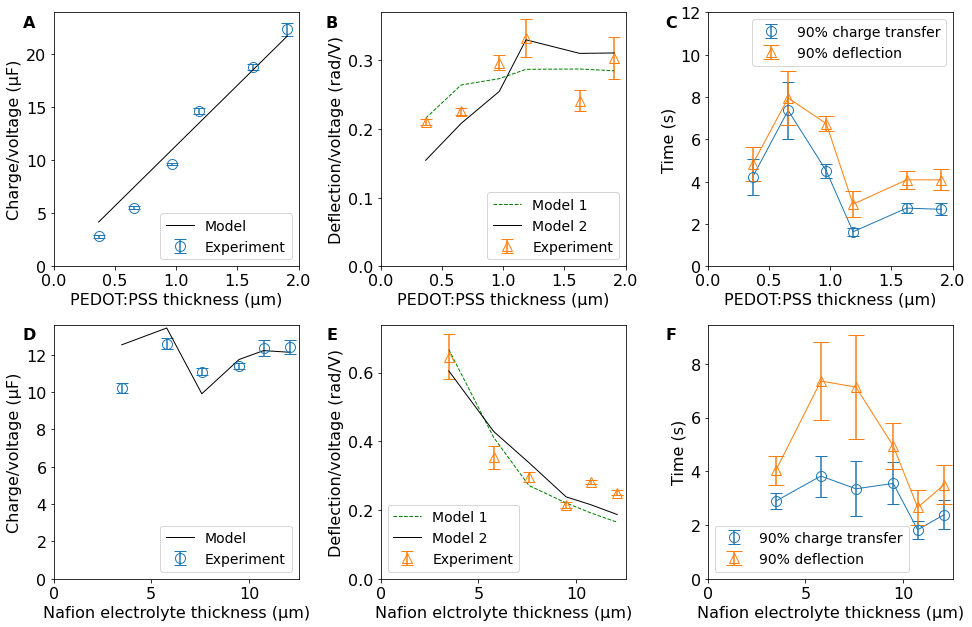

In [10]:
## Analysis

n=2.5/7  ###change
w = 0.2 #mm
l = 3 #mm

## PP thickness varied

PPtop = [0.371225, 0.719525, 1.01625, 1.23645, 1.662525, 1.956575]
PPbot = [0.36425, 0.6041, 0.9246, 1.14055, 1.5874, 1.86215]
naf = [5.625, 5.58405, 5.7613, 5.578425, 5.507525, 5.432475]

df = pd.read_csv('resultsPP.csv')
# ['file', 'm_Q', 'm_def', 't_Q_mean', 't_def_mean', 'thickness']
df['m_Q'] = abs(df['m_Q'])
df['m_def'] = abs(df['m_def'])
df['t_Q_mean'] = abs(df['t_Q_mean'])
df['t_def_mean'] = abs(df['t_def_mean'])

dfg = df.groupby('thickness').agg({'m_Q': ['mean', 'std'], 'm_def': ['mean', 'std'], 't_Q_mean': ['mean', 'std'], 't_def_mean': ['mean', 'std']})
dfg['thickness'] = dfg.index
# print(dfg)

dfg['PPtop'] = [PPtop[i-1] for i in dfg['thickness']]
dfg['PPbot'] = [PPbot[i-1] for i in dfg['thickness']]
dfg['naf'] = [naf[i-1] for i in dfg['thickness']]
dfg['PP'] = 2/(1/dfg['PPtop']+1/dfg['PPbot'])

hP2 = dfg['PPtop'].to_numpy()
hP1 = dfg['PPbot'].to_numpy()
hN = dfg['naf'].to_numpy()
mQ = dfg['m_Q']['mean'].to_numpy()
mdef = dfg['m_def']['mean'].to_numpy()

hP = 2/(1/hP2+1/hP1)

def fitmQ(hP, Cv):
    return 1/2*Cv*w*l*hP

# curvefit hPreduced to fitmQ to mQ
para, cov = curve_fit(fitmQ, hP, mQ)

Cvv = para[0]
print(Cvv)

m2 = hN/hP1
m3 = hP2/hP1
n2 = n
n3 = 1
X12 = m2*n2*(1+m2)*(1/2*Cvv*hP/hP1)
X13 = m3*n3*(1+2*m2+m3)*(1/2*Cvv*hP/hP1 + 1/2*Cvv*hP/hP2)
X23 = m2*n2*m3*n3*(m2+m3)*(1/2*Cvv*hP/hP2)
Y2 = 4*m2*n2+6*m2**2*n2 +4*m2**3*n2+m2**4*n2**2
Y3 = 4*m3*n3+6*m3**2*n3+4*m3**3*n3+m3**4*n3**2
Y23 = m2*m3*n3*((4*m2**2+6*m2*m3+4*m3**2)*n2+12*(1+m2+m3))
coeffDu = 1/6* hP1*(1+Y2+Y3+Y23)/(X12+X13+X23)
# print(coeffDu)

def fitmdef(coeffDu, alpha):
    RVappl = coeffDu/alpha
    defpVappl = l/(2*RVappl)
    return defpVappl

para, cov = curve_fit(fitmdef, coeffDu, mdef, p0=[20])
alpha1 = para[0]
print(alpha1)



X12 = m2*n2*(1+m2)*(mQ/(w*l*hP1))
X13 = m3*n3*(1+2*m2+m3)*(mQ/(w*l*hP1) + mQ/(w*l*hP2))
X23 = m2*n2*m3*n3*(m2+m3)*(mQ/(w*l*hP2))

coeffDuQ = 1/6* hP1*(1+Y2+Y3+Y23)/(X12+X13+X23)
# print(coeffDu)

def fitmdefQ(coeffDuQ, alpha):
    RVappl = coeffDuQ/alpha
    defpVappl = l/(2*RVappl)
    return defpVappl

para, cov = curve_fit(fitmdefQ, coeffDuQ, mdef, p0=[20])
alpha2 = para[0]
print(alpha2)



fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(14,9))

msiz = 10

#plot m_Q vs thickness with error bars on ax1
# Cv = 2* (0.169/1.6) / (0.7*4.35*2.1) #mF mm^-2 um^-1
# print(Cv)
# Cv_w_l = Cv * 0.2*3  #mF mm^-2
# ax1.plot([0,2], [0,2*C_per_thic], color='green', lw=1)


ax1.errorbar(dfg['PP'], 1000*dfg['m_Q']['mean'], yerr=1000*dfg['m_Q']['std'],  fmt='o', mec='tab:blue', mfc='none', ecolor='tab:blue', label='Experiment', capsize=6, capthick=1, markersize=msiz)
ax1.plot(hP, 1000*fitmQ(hP,Cvv), color='black', lw=1, label='Model')
# ax1.plot(np.concatenate((np.array([0]),hP)), np.concatenate((np.array([0]), Cvv*w*l*hPreduced)), color='black', lw=1, label='Model')
ax1.set_xlabel('PEDOT:PSS thickness (μm)')
ax1.set_ylabel('Charge/voltage (μF)')
ax1.set_xlim(0,2)
ax1.set_ylim(bottom=0)
ax1.legend(loc='lower right')
# ax1.xaxis.set_major_locator(MultipleLocator(1))


ax2.errorbar(dfg['PP'], dfg['m_def']['mean'], yerr=dfg['m_def']['std'], fmt='^', mec='tab:orange', mfc='none', ecolor='tab:orange', label='Experiment', capsize=6, capthick=1, markersize=msiz)
ax2.set_xlabel('PEDOT:PSS thickness (μm)')
ax2.set_ylabel('Deflection/voltage (rad/V)')
ax2.plot(hP, fitmdef(coeffDu, alpha1), color='green', label='Model 1', lw=1, linestyle='--')
ax2.plot(hP, fitmdefQ(coeffDuQ, alpha2), color='black', label='Model 2', lw=1)
ax2.set_xlim(0,2)
ax2.set_ylim(bottom=0)
#legend at bottom right corner
ax2.legend(loc='lower right')


ax3.errorbar(dfg['PP'], dfg['t_Q_mean']['mean'], yerr=dfg['t_Q_mean']['std'], fmt='o', mec='tab:blue', mfc='none', ecolor='tab:blue', label='90% charge transfer', capsize=6, capthick=1, markersize=msiz)
# connect the points with a line
ax3.plot(dfg['PP'].to_numpy(), dfg['t_Q_mean']['mean'].to_numpy(), color='tab:blue', lw=1)
ax3.errorbar(dfg['PP'], dfg['t_def_mean']['mean'], yerr=dfg['t_def_mean']['std'], fmt='^', mec='tab:orange', mfc='none', ecolor='tab:orange', label='90% deflection', capsize=8, capthick=1, markersize=msiz)
# connect the points with a line. datapoints are connected for easier visualisation
ax3.plot(dfg['PP'].to_numpy(), dfg['t_def_mean']['mean'].to_numpy(), color='tab:orange', lw=1)
ax3.set_xlabel('PEDOT:PSS thickness (μm)')
ax3.set_ylabel('Time (s)')
ax3.set_xlim(0,2)
ax3.set_ylim(0,12)
ax3.legend()



## Nafion thickness varied

df = pd.read_csv('resultsnaf.csv')
# ['file', 'm_Q', 'm_def', 't_Q_mean', 't_def_mean', 'thickness']
PPbot = [1.37645, 1.414825, 1.4033, 1.319425, 1.34335, 1.26585]
PPtop = [0.8739, 0.8696, 0.8201, 0.6528, 1.0581, 0.9796]
naf = [12.108925, 10.7468, 9.494775, 7.586625, 5.791975, 3.489575]
PPbot.reverse()
PPtop.reverse()
naf.reverse()

df['m_Q'] = abs(df['m_Q'])
df['m_def'] = abs(df['m_def'])
df['t_Q_mean'] = abs(df['t_Q_mean'])
df['t_def_mean'] = abs(df['t_def_mean'])

dfg = df.groupby('thickness').agg({'m_Q': ['mean', 'std'], 'm_def': ['mean', 'std'], 't_Q_mean': ['mean', 'std'], 't_def_mean': ['mean', 'std']})
dfg['thickness'] = dfg.index
# print(dfg)

dfg['PPtop'] = [PPtop[int((i-2)/3-1)] for i in dfg['thickness']]
dfg['PPbot'] = [PPbot[int((i-2)/3-1)] for i in dfg['thickness']]
dfg['naf'] = [naf[int((i-2)/3-1)] for i in dfg['thickness']]

dfg['PP'] = (dfg['PPtop']+dfg['PPbot'])/2

# hP2 = dfg['PP'].to_numpy()
# hP1 = dfg['PP'].to_numpy()
hP2 = dfg['PPtop'].to_numpy()
hP1 = dfg['PPbot'].to_numpy()
hN = dfg['naf'].to_numpy()
mQ = dfg['m_Q']['mean'].to_numpy()
mdef = dfg['m_def']['mean'].to_numpy()

hP = 2/(1/hP2+1/hP1)

def fitmQ(hP, Cv):
    return 1/2*Cv*w*l*hP

para, cov = curve_fit(fitmQ, hP, mQ)

Cvv = para[0]
print(Cvv)
Cvv = 0.03783770583924643

m2 = hN/hP1
m3 = hP2/hP1
n2 = n
n3 = 1
X12 = m2*n2*(1+m2)*(1/2*Cvv*hP/hP1)
X13 = m3*n3*(1+2*m2+m3)*(1/2*Cvv*hP/hP1 + 1/2*Cvv*hP/hP2)
X23 = m2*n2*m3*n3*(m2+m3)*(1/2*Cvv*hP/hP2)
Y2 = 4*m2*n2+6*m2**2*n2 +4*m2**3*n2+m2**4*n2**2
Y3 = 4*m3*n3+6*m3**2*n3+4*m3**3*n3+m3**4*n3**2
Y23 = m2*m3*n3*((4*m2**2+6*m2*m3+4*m3**2)*n2+12*(1+m2+m3))
coeffDu = 1/6* hP1*(1+Y2+Y3+Y23)/(X12+X13+X23)
# print(coeffDu)

def fitmdef(coeffDu, alpha):
    RVappl = coeffDu/alpha
    defpVappl = l/(2*RVappl)
    return defpVappl


#curvefit hP, h1_h2 to fitmdef to mdef to get alpha
para, cov = curve_fit(fitmdef, coeffDu, mdef, p0=[20])
alpha1 = para[0]
print(alpha1)



X12 = m2*n2*(1+m2)*(mQ/(w*l*hP1))
X13 = m3*n3*(1+2*m2+m3)*(mQ/(w*l*hP1) + mQ/(w*l*hP2))
X23 = m2*n2*m3*n3*(m2+m3)*(mQ/(w*l*hP2))

coeffDuQ = 1/6* hP1*(1+Y2+Y3+Y23)/(X12+X13+X23)
# print(coeffDu)

def fitmdefQ(coeffDuQ, alpha):
    RVappl = coeffDuQ/alpha
    defpVappl = l/(2*RVappl)
    return defpVappl

para, cov = curve_fit(fitmdefQ, coeffDuQ, mdef, p0=[20])
alpha2 = para[0]
print(alpha2)



msiz = 10

#plot m_Q vs thickness with error bars on ax1
# Cv = 2* (0.169/1.6) / (0.7*4.35*2.1) #mF mm^-2 um^-1
# print(Cv)
# Cv_w_l = Cv * 0.2*3  #mF mm^-2
# ax1.plot([0,2], [0,2*C_per_thic], color='green', lw=1)


ax4.errorbar(dfg['naf'], 1000*dfg['m_Q']['mean'], yerr=1000*dfg['m_Q']['std'],  fmt='o', mec='tab:blue', mfc='none', ecolor='tab:blue', label='Experiment', capsize=6, capthick=1, markersize=msiz)
ax4.plot(hN, 1000*fitmQ(hP, Cvv), color='black', lw=1, label='Model')
ax4.set_xlabel('Nafion electrolyte thickness (μm)')
ax4.set_ylabel('Charge/voltage (μF)')
ax4.set_xlim(left=0)
ax4.set_ylim(bottom=0)
ax4.legend(loc='lower right')


ax5.errorbar(dfg['naf'], dfg['m_def']['mean'], yerr=dfg['m_def']['std'], fmt='^', mec='tab:orange', mfc='none', ecolor='tab:orange', label='Experiment', capsize=6, capthick=1, markersize=msiz)
ax5.set_xlabel('Nafion elctrolyte thickness (μm)')
ax5.set_ylabel('Deflection/voltage (rad/V)')
ax5.plot(hN, fitmdef(coeffDu, alpha1), color='green', label='Model 1', lw=1, linestyle='--')
ax5.plot(hN, fitmdef(coeffDuQ, alpha2), color='black', label='Model 2', lw=1)
ax5.set_xlim(left=0)
ax5.set_ylim(bottom=0)
ax5.legend(loc='lower left')


ax6.errorbar(dfg['naf'], dfg['t_Q_mean']['mean'], yerr=dfg['t_Q_mean']['std'], fmt='o', mec='tab:blue', mfc='none', ecolor='tab:blue', label='90% charge transfer', capsize=6, capthick=1, markersize=msiz)
# connect the points with a line
ax6.plot(dfg['naf'].to_numpy(), dfg['t_Q_mean']['mean'].to_numpy(), color='tab:blue', lw=1)
ax6.errorbar(dfg['naf'], dfg['t_def_mean']['mean'], yerr=dfg['t_def_mean']['std'], fmt='^', mec='tab:orange', mfc='none', ecolor='tab:orange', label='90% deflection', capsize=8, capthick=1, markersize=msiz)
# connect the points with a line. datapoints are connected for easier visualisation
ax6.plot(dfg['naf'].to_numpy(), dfg['t_def_mean']['mean'].to_numpy(), color='tab:orange', lw=1)
ax6.set_xlabel('Nafion electrolyte thickness (μm)')
ax6.set_ylabel('Time (s)')
ax6.set_xlim(left=0)
ax6.set_ylim(bottom=0)
ax6.legend()



ax1.text(-0.1, 0.96, 'A', horizontalalignment='center', verticalalignment='center', transform=ax1.transAxes, fontsize=16, color='black', fontweight='bold')
ax2.text(-0.2, 0.96, 'B', horizontalalignment='center', verticalalignment='center', transform=ax2.transAxes, fontsize=16, color='black', fontweight='bold')
ax3.text(-0.15, 0.96, 'C', horizontalalignment='center', verticalalignment='center', transform=ax3.transAxes, fontsize=16, color='black', fontweight='bold')
ax4.text(-0.1, 0.96, 'D', horizontalalignment='center', verticalalignment='center', transform=ax4.transAxes, fontsize=16, color='black', fontweight='bold')
ax5.text(-0.2, 0.96, 'E', horizontalalignment='center', verticalalignment='center', transform=ax5.transAxes, fontsize=16, color='black', fontweight='bold')
ax6.text(-0.15, 0.96, 'F', horizontalalignment='center', verticalalignment='center', transform=ax6.transAxes, fontsize=16, color='black', fontweight='bold')
plt.tight_layout()
#save svg
# plt.savefig('resultsboth.svg',format='svg')
# plt.savefig('resultsboth.png',format='png',dpi=600)

0.68
1.27
1.82
2.27
3.4099999999999997
4.55
9.09


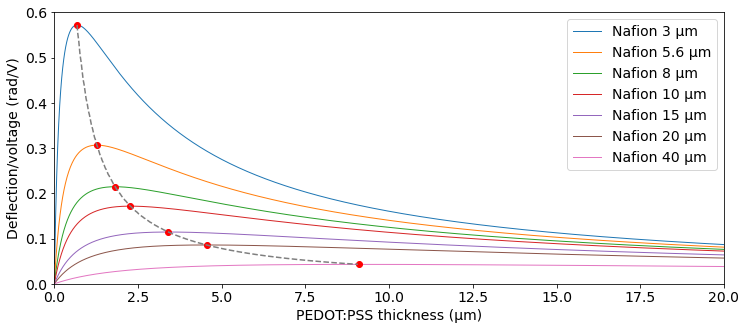

In [2]:
## predictions
n=2.5/7  ###change
w = 0.2 #mm
l = 3 #mm

def fitmQ(hP2, hP1, Cvv=0.03783770583924643):
    hP = 2/(1/hP2+1/hP1)
    return 1/2*Cvv*w*l*hP

def fitmdef(hP2, hP1, hN, Cvv=0.03783770583924643, n=2.5/7, alpha=44):
    m2 = hN/hP1
    m3 = hP2/hP1
    n2 = n
    n3 = 1
    X12 = m2*n2*(1+m2)*(1/2*Cvv*hP/hP1)
    X13 = m3*n3*(1+2*m2+m3)*(1/2*Cvv*hP/hP1 + 1/2*Cvv*hP/hP2)
    X23 = m2*n2*m3*n3*(m2+m3)*(1/2*Cvv*hP/hP2)
    Y2 = 4*m2*n2+6*m2**2*n2 +4*m2**3*n2+m2**4*n2**2
    Y3 = 4*m3*n3+6*m3**2*n3+4*m3**3*n3+m3**4*n3**2
    Y23 = m2*m3*n3*((4*m2**2+6*m2*m3+4*m3**2)*n2+12*(1+m2+m3))
    coeffDu = 1/6* hP1*(1+Y2+Y3+Y23)/(X12+X13+X23)
    RVappl = coeffDu/alpha
    defpVappl = l/(2*RVappl)
    return defpVappl



fig, ax2 = plt.subplots(1, 1, figsize=(12,5))

msiz = 10


hP = np.arange(0.01,20,0.01)


for i in [3, 5.6, 8, 10, 15, 20, 40]:
    ax2.plot(hP, fitmdef(hP,hP, i), lw=1, label='Nafion '+str(i)+' μm')

# Find peaks for the deflection/voltage plots
for i in [3, 5.6, 8, 10, 15, 20, 40]:
    ydata = fitmdef(hP, hP, i)
    max_index = np.argmax(ydata)
    max_time = hP[max_index]
    ax2.plot(max_time, ydata[max_index], 'ro')
    print(max_time)


list_of_peaks = []
list_of_peaks_x = []
for i in np.arange(3, 40, 0.1):
    ydata = fitmdef(hP, hP, i)
    max_index = np.argmax(ydata)
    max_time = hP[max_index]
    # ax2.plot(max_time, ydata[max_index], 'ro')
    list_of_peaks.append(ydata[max_index])
    list_of_peaks_x.append(max_time)

ax2.plot(list_of_peaks_x, list_of_peaks, '--')


ax2.set_xlabel('PEDOT:PSS thickness (μm)')
ax2.set_ylabel('Deflection/voltage (rad/V)')

ax2.set_xlim(0,20)
ax2.set_ylim(bottom=0)
ax2.legend(loc='upper right')


# plt.savefig('predictions.svg',format='svg')
# plt.savefig('predictions.png',format='png',dpi=600)